# Single Droplet (Density, Deposition, Time)

In [1]:
from load_trajectories import get_timestamps, load_trajectories
# Using the NPL 2024a kernel
import os
import os.path

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
# filepaths for trajectories
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/SDM_trajs/"

In [3]:
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 5 timestamps (every five minutes)
coarse_timestamps = timestamps[0::10]
print(coarse_timestamps)
trajs = load_trajectories(dirpath, times=coarse_timestamps)

[5100 5400 5700 6000 6300 6600 6900 7200]
Loading trajectories for time 5100 
Loading trajectories for time 5400 
Loading trajectories for time 5700 
Loading trajectories for time 6000 
Loading trajectories for time 6300 


In [22]:
trajsValid = trajs[trajs["z[m]"] > 0]
trajsValid

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
941890922,3365.9489,11412.724,9685.8124,0.0,0.0,2.592756e-14,4.376272e-06,4.376272e-06,492.28503,65.00,75461926912,ICE,362,0.0,1,5100
941891358,3470.2284,11312.791,9774.1511,0.0,0.0,6.188427e-15,2.181588e-05,2.181588e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5100
941891618,3428.1492,11409.900,9698.6391,0.0,0.0,4.710390e-13,6.156993e-06,6.156993e-06,471.83878,445.00,13224001536,ICE,1058,0.0,1,5100
941892399,3259.9497,11273.936,9563.3612,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5100
941892406,3345.1765,11404.391,9607.2140,0.0,0.0,9.147055e-14,2.337560e-05,2.337560e-05,464.72437,367.27,51057549312,ICE,1846,0.0,1,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973233120,11694.1830,11324.702,9211.6710,0.0,0.0,2.745674e-14,1.003203e-07,1.003203e-07,916.80000,246.36,75046199296,ICE,1357280,0.0,1,6300
973233152,11710.4470,11223.321,9171.0216,0.0,0.0,1.037608e-13,4.121637e-06,4.121637e-06,498.18273,99.55,47601819648,ICE,1357312,0.0,1,6300
973233334,11506.7880,11266.736,9170.7583,0.0,0.0,6.560474e-14,1.573156e-05,1.573156e-05,472.87768,859.55,59780882432,ICE,1357494,0.0,1,6300


In [51]:
dropletIDs = trajsValid.loc[[941890922, 941891358, 941891618, 973233334, 941892406]]
# updatedID = dropletIDs.reset_index()
dropletIDs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
941890922,3365.9489,11412.724,9685.8124,0.0,0.0,2.592756e-14,4.376272e-06,4.376272e-06,492.28503,65.00,75461926912,ICE,362,0.0,1,5100
941890922,3304.3305,11438.472,9772.4468,0.0,0.0,2.592756e-14,7.693520e-06,7.693520e-06,485.76874,65.00,75461926912,ICE,362,0.0,1,5400
941890922,3228.5191,11453.303,9740.0989,0.0,0.0,2.592756e-14,9.138286e-06,9.138286e-06,487.61025,65.00,75461926912,ICE,362,0.0,1,5700
941890922,3200.2054,11460.603,9668.1005,0.0,0.0,2.592756e-14,1.000000e-07,1.000000e-07,916.80000,65.00,75461926912,ICE,362,0.0,1,6000
941890922,3169.1635,11432.804,9675.8070,0.0,0.0,2.592756e-14,7.389423e-06,7.389423e-06,488.36100,65.00,75461926912,ICE,362,0.0,1,6300
941891358,3470.2284,11312.791,9774.1511,0.0,0.0,6.188427e-15,2.181588e-05,2.181588e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5100
941891358,3420.4592,11270.460,9668.9837,0.0,0.0,6.188427e-15,2.097776e-05,2.097776e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5400
941891358,3386.8271,11268.232,9578.2219,0.0,0.0,6.188427e-15,2.012662e-05,2.012662e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5700
941891358,3374.7862,11302.366,9586.9418,0.0,0.0,6.188427e-15,2.035590e-05,2.035590e-05,457.91236,134.09,59351068672,ICE,798,0.0,1,6000


In [53]:
updatedIDArray = pd.unique(updatedID['rk_deact'])
updatedIDArray

/glade/derecho/scratch/ashleyn/tmp/ipykernel_34359/1695250035.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  updatedIDArray = pd.unique(updatedID['rk_deact'])


array([941890922, 941891358, 941891618, 973233334, 941892406])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


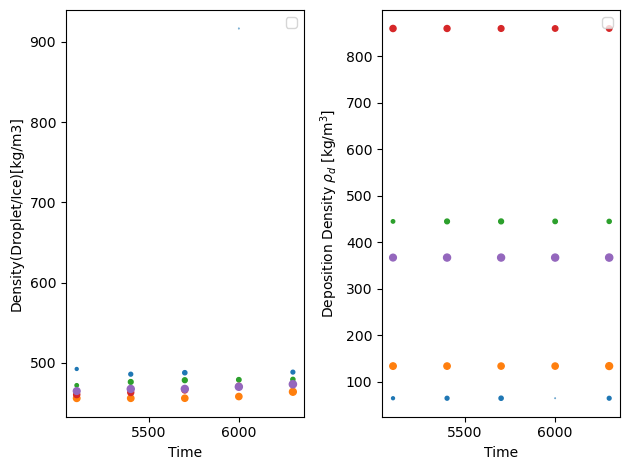

In [80]:
updatedID = dropletIDs.to_xarray()

fig, (ax1, ax2) = plt.subplots(1, 2)

for id in updatedIDArray:
    time = updatedID["time"].sel(rk_deact=id)
    density = updatedID["density(droplet/ice)[kg/m3]"].sel(rk_deact=id)
    depositionDensity =  updatedID["rhod [kg/m3]"].sel(rk_deact=id)
    rads = 1e6 * updatedID["radius_eq(ice)[m]"].sel(rk_deact=id)

    #plot
    ax1.set_ylabel("Density(Droplet/Ice)[kg/m3]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, density, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

In [27]:
id = updatedIDArray[1]
df_id = updatedID[updatedID['rk_deact'] == id]
density = df_id['density(droplet/ice)[kg/m3]']
density

5    455.79175
6    455.79175
7    455.79175
8    457.91236
9    463.81393
Name: density(droplet/ice)[kg/m3], dtype: float64

# Radius x Time

In [59]:
updatedID = dropletIDs.to_xarray()
updatedID

<xarray.Dataset>
Dimensions:                                  (rk_deact: 25)
Coordinates:
  * rk_deact                                 (rk_deact) int64 941890922 ... 9...
Data variables: (12/16)
    x[m]                                     (rk_deact) float64 3.366e+03 ......
    y[m]                                     (rk_deact) float64 1.141e+04 ......
    z[m]                                     (rk_deact) float64 9.686e+03 ......
    vz[m]                                    (rk_deact) float64 0.0 0.0 ... 0.0
    radius(droplet)[m]                       (rk_deact) float64 0.0 0.0 ... 0.0
    mass_of_aerosol_in_droplet/ice(1:01)[g]  (rk_deact) float64 2.593e-14 ......
    ...                                       ...
    multiplicity[-]                          (rk_deact) int64 75461926912 ......
    status[-]                                (rk_deact) object 'ICE' ... 'ICE'
    index                                    (rk_deact) int64 362 362 ... 1846
    rime_mass[kg]                            (rk_deact) float64 0.0 0.0 ... 0.0
    num_of_monomers[-]                       (rk_deact) int64 1 1 1 1 ... 1 1 1
    time                                     (rk_deact) int64 5100 5400 ... 6300

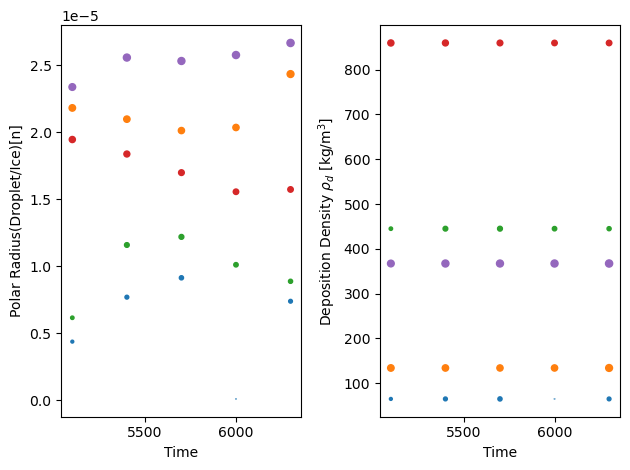

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2)


for id in updatedIDArray:
    time = updatedID["time"].sel(rk_deact=id)
    radius = updatedID["radius_pol(ice)[m]"].sel(rk_deact=id)
    rads = 1e6 * updatedID["radius_pol(ice)[m]"].sel(rk_deact=id)
    depositionDensity =  updatedID["rhod [kg/m3]"].sel(rk_deact=id)

    #plot
    ax1.set_ylabel("Polar Radius(Droplet/Ice)[n]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, radius, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)
    
plt.tight_layout()
plt.show()

# Number of Superdroplets over Time

In [69]:
trajsValid

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
941890922,3365.9489,11412.724,9685.8124,0.0,0.0,2.592756e-14,4.376272e-06,4.376272e-06,492.28503,65.00,75461926912,ICE,362,0.0,1,5100
941891358,3470.2284,11312.791,9774.1511,0.0,0.0,6.188427e-15,2.181588e-05,2.181588e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5100
941891618,3428.1492,11409.900,9698.6391,0.0,0.0,4.710390e-13,6.156993e-06,6.156993e-06,471.83878,445.00,13224001536,ICE,1058,0.0,1,5100
941892399,3259.9497,11273.936,9563.3612,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5100
941892406,3345.1765,11404.391,9607.2140,0.0,0.0,9.147055e-14,2.337560e-05,2.337560e-05,464.72437,367.27,51057549312,ICE,1846,0.0,1,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973233120,11694.1830,11324.702,9211.6710,0.0,0.0,2.745674e-14,1.003203e-07,1.003203e-07,916.80000,246.36,75046199296,ICE,1357280,0.0,1,6300
973233152,11710.4470,11223.321,9171.0216,0.0,0.0,1.037608e-13,4.121637e-06,4.121637e-06,498.18273,99.55,47601819648,ICE,1357312,0.0,1,6300
973233334,11506.7880,11266.736,9170.7583,0.0,0.0,6.560474e-14,1.573156e-05,1.573156e-05,472.87768,859.55,59780882432,ICE,1357494,0.0,1,6300


In [74]:
allIDs = trajsValid.reset_index()
allIDs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
0,941890922,3365.9489,11412.724,9685.8124,0.0,0.0,2.592756e-14,4.376272e-06,4.376272e-06,492.28503,65.00,75461926912,ICE,362,0.0,1,5100
1,941891358,3470.2284,11312.791,9774.1511,0.0,0.0,6.188427e-15,2.181588e-05,2.181588e-05,455.79175,134.09,59351068672,ICE,798,0.0,1,5100
2,941891618,3428.1492,11409.900,9698.6391,0.0,0.0,4.710390e-13,6.156993e-06,6.156993e-06,471.83878,445.00,13224001536,ICE,1058,0.0,1,5100
3,941892399,3259.9497,11273.936,9563.3612,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5100
4,941892406,3345.1765,11404.391,9607.2140,0.0,0.0,9.147055e-14,2.337560e-05,2.337560e-05,464.72437,367.27,51057549312,ICE,1846,0.0,1,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802870,973233120,11694.1830,11324.702,9211.6710,0.0,0.0,2.745674e-14,1.003203e-07,1.003203e-07,916.80000,246.36,75046199296,ICE,1357280,0.0,1,6300
7802871,973233152,11710.4470,11223.321,9171.0216,0.0,0.0,1.037608e-13,4.121637e-06,4.121637e-06,498.18273,99.55,47601819648,ICE,1357312,0.0,1,6300
7802872,973233334,11506.7880,11266.736,9170.7583,0.0,0.0,6.560474e-14,1.573156e-05,1.573156e-05,472.87768,859.55,59780882432,ICE,1357494,0.0,1,6300
7802873,973233486,11851.9560,11259.399,9842.3434,0.0,0.0,1.275344e-13,1.707510e-05,1.707510e-05,463.70708,272.27,41931067392,ICE,1357646,0.0,1,6300


In [78]:
updatedRK_DEACT = pd.unique(allIDs['rk_deact'])
updatedRK_DEACT

array([941890922, 941891358, 941891618, ..., 105420110, 105420276,
       105422493])

In [ ]:
for id in updatedRK_DEACT:
    time = allIDs["time"].sel(rk_deact=id)